# Labor 2

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import IPython.display as ipd

import scipy.io.wavfile as wav
import librosa

#### a. 1. Plotten und h√∂ren Sie sich den Grundton y(t) ihrer Stimmb√§nder (f-male=130Hz,f-female=200Hz;x = 1.0; t = 2s) an, und berechnen Sie anschlie√üend die mittlere Leistung des Schallsignals in der Zeitdom√§ne.

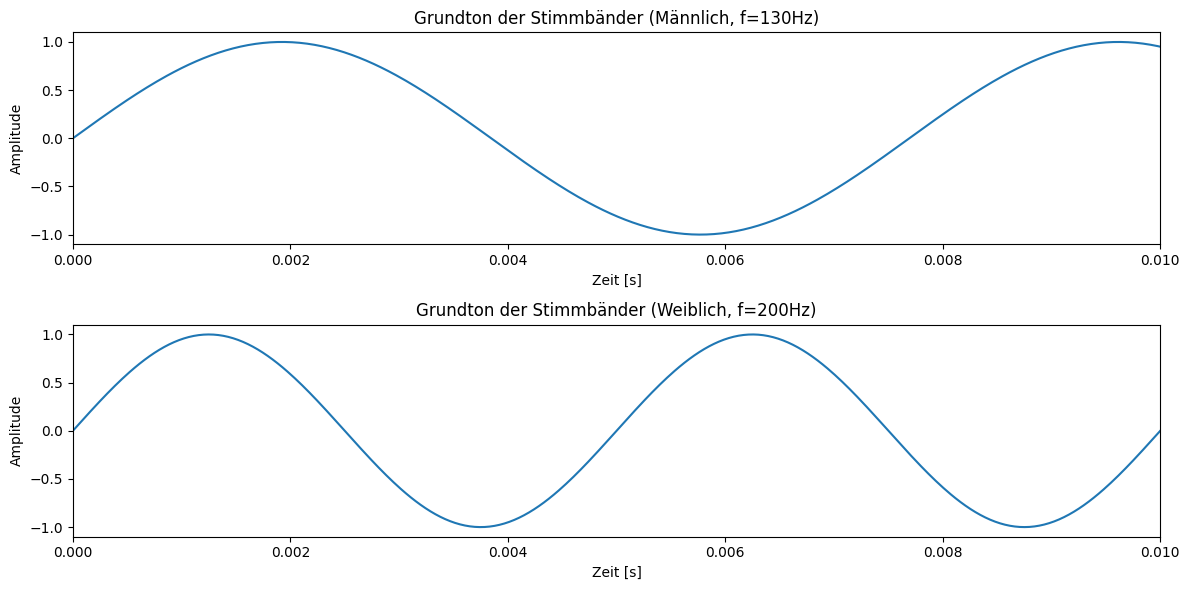

M√§nnlicher Grundton (130 Hz):


Weiblicher Grundton (200 Hz):


In [35]:

def grundton(t, f):
    return np.sin(2 * np.pi * f * t)

# Parameter
amplitude = 1.0  # Amplitude
duration = 2.0  # Dauer in Sekunden
sampling_rate = 44100  # Abtastrate in Hz
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)  # Zeitvektor
f_male = 130  # Grundtonfrequenz f√ºr m√§nnliche Stimmen
f_female = 200  # Grundtonfrequenz f√ºr weibliche Stimmen

# Grundton f√ºr m√§nnliche Stimme
y_male = amplitude * grundton(t, f_male)

# Grundton f√ºr weibliche Stimme
y_female = amplitude * grundton(t, f_female)

# Plotten der Signale
plt.figure(figsize=(12, 6))

# Plot f√ºr m√§nnliche Stimme
plt.subplot(2, 1, 1)
plt.plot(t, y_male)
plt.xlim(0, 0.01)
plt.title('Grundton der Stimmb√§nder (M√§nnlich, f=130Hz)')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')

# Plot f√ºr weibliche Stimme
plt.subplot(2, 1, 2)
plt.plot(t, y_female)
plt.xlim(0, 0.01)
plt.title('Grundton der Stimmb√§nder (Weiblich, f=200Hz)')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Speichere die T√∂ne als WAV-Dateien
male_file = "grundton_male.wav"
female_file = "grundton_female.wav"
write(male_file, sampling_rate, y_male.astype(np.float32))
write(female_file, sampling_rate, y_female.astype(np.float32))

# Audioausgabe zum Anh√∂ren
print("M√§nnlicher Grundton (130 Hz):")
ipd.display(ipd.Audio(y_male, rate=sampling_rate))

print("Weiblicher Grundton (200 Hz):")
ipd.display(ipd.Audio(y_female, rate=sampling_rate))

In [36]:

# Mittlere Leistung berechnen
power_male_time = 1/2.0 * np.mean(y_male**2) 
power_female_time = 1/2.0 * np.mean(y_female**2)

print("Mittlere Leistung des m√§nnlichen Schallsignals:", power_male_time)
print("Mittlere Leistung des weiblichen Schallsignals:", power_female_time)


Mittlere Leistung des m√§nnlichen Schallsignals: 0.25
Mittlere Leistung des weiblichen Schallsignals: 0.24999999999999997


##### Bestimmen Sie dann das Spektrum Y(f) und plotten Sie den Betrag |Y(f)|  und das Betragsquadrat |Y(f)|^2 . 

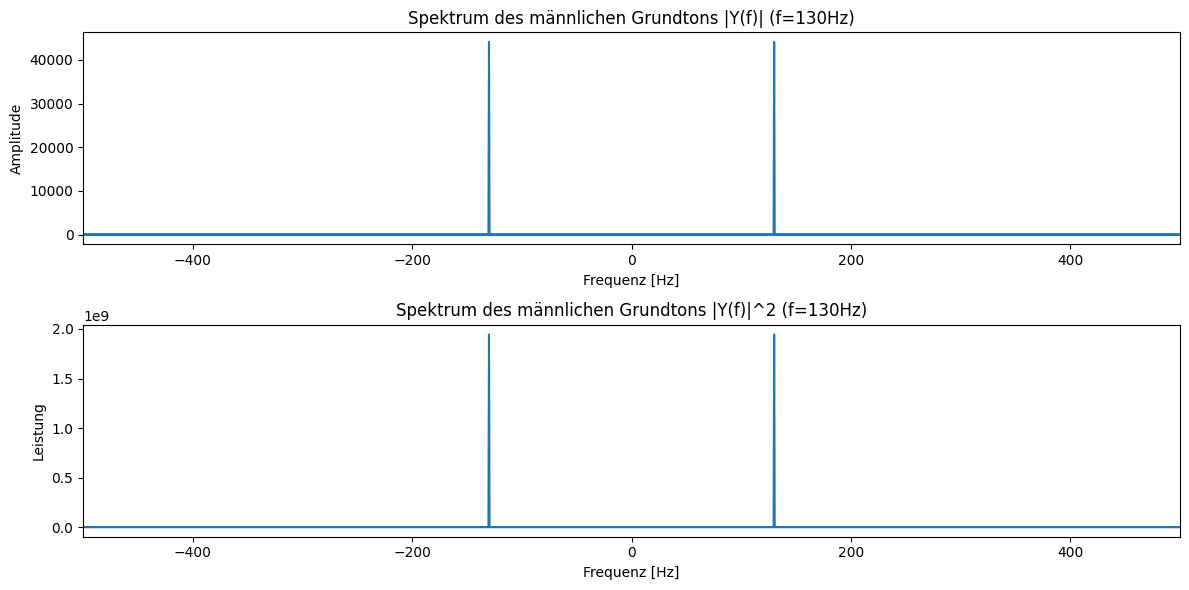

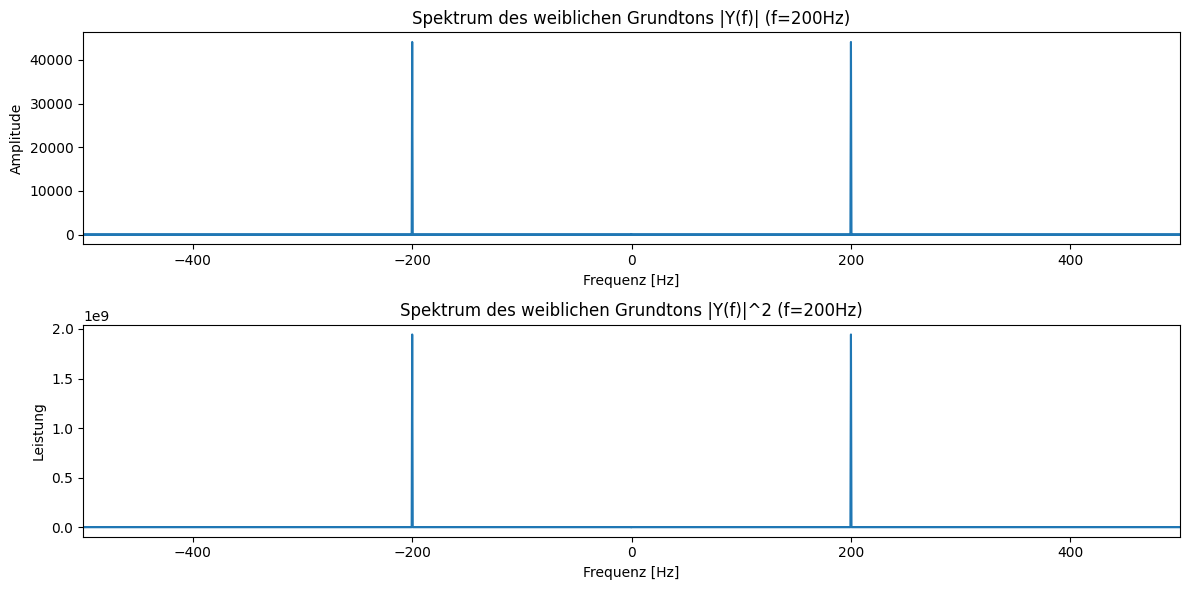

In [37]:

# Berechnung des Spektrums Y(f)
def calculate_spectrum(signal, sampling_rate):
    spectrum = np.fft.fft(signal)
    freq = np.fft.fftfreq(len(signal), 1 / sampling_rate)
    return spectrum, freq

# Spektrum f√ºr m√§nnlichen Grundton
spectrum_male, freq_male = calculate_spectrum(y_male, sampling_rate)

# Spektrum f√ºr weiblichen Grundton
spectrum_female, freq_female = calculate_spectrum(y_female, sampling_rate)


# Plotten des Spektrums |Y(f)| und |Y(f)|^2 f√ºr m√§nnliche Stimme
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(freq_male, np.abs(spectrum_male))
plt.xlim(-500, 500)
plt.title('Spektrum des m√§nnlichen Grundtons |Y(f)| (f=130Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freq_male, np.abs(spectrum_male)**2)
plt.xlim(-500, 500)
plt.title('Spektrum des m√§nnlichen Grundtons |Y(f)|^2 (f=130Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Leistung')

plt.tight_layout()
plt.show()

# Plotten des Spektrums |Y(f)| und |Y(f)|^2 f√ºr weibliche Stimme
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(freq_female, np.abs(spectrum_female))
plt.xlim(-500, 500)
plt.title('Spektrum des weiblichen Grundtons |Y(f)| (f=200Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freq_female, np.abs(spectrum_female)**2)
plt.xlim(-500, 500)
plt.title('Spektrum des weiblichen Grundtons |Y(f)|^2 (f=200Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Leistung')

plt.tight_layout()
plt.show()

##### Erkl√§rung der Diagramme Stimmen die Leistungswerte im Zeit- und Frequenzbereich √ºberein? 

##### Plotten Sie zus√§tzlich den Real- und Imagin√§rteil und das Phasen-spektrum.

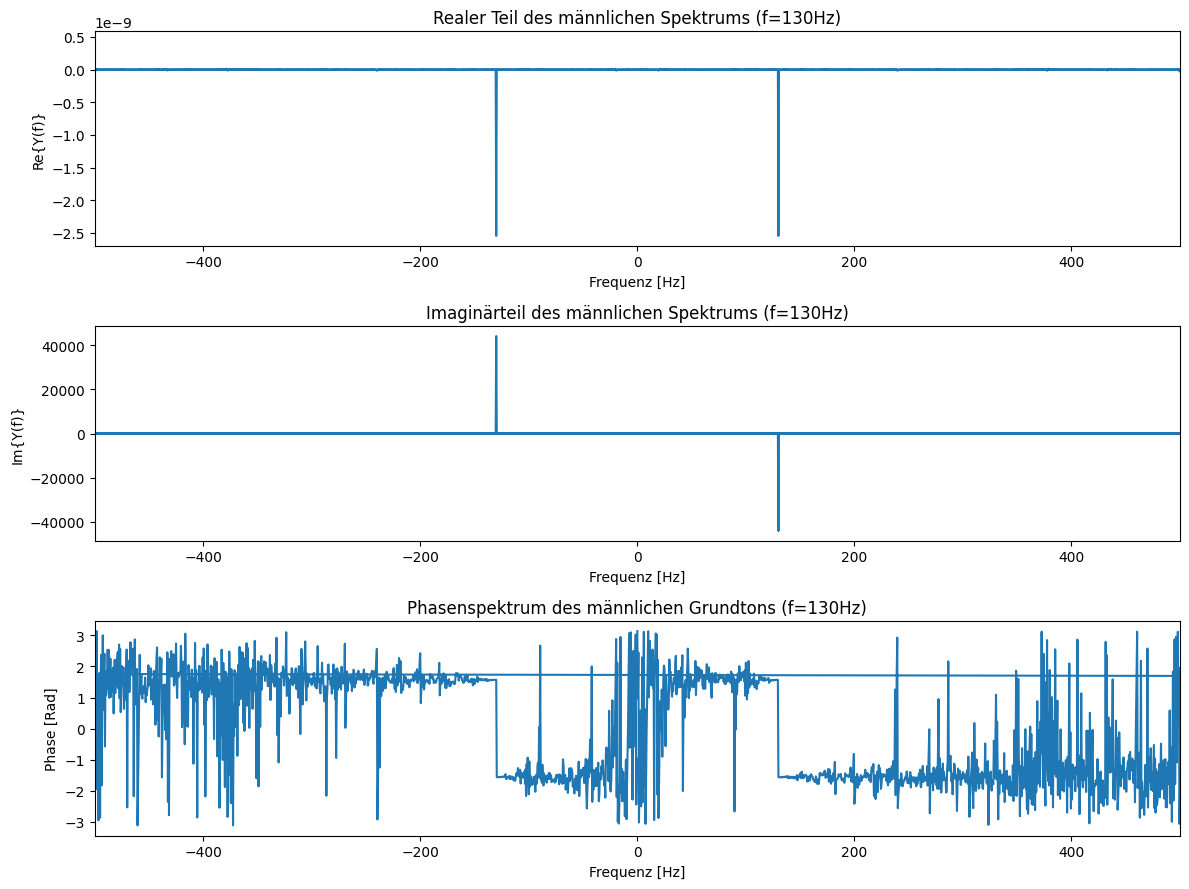

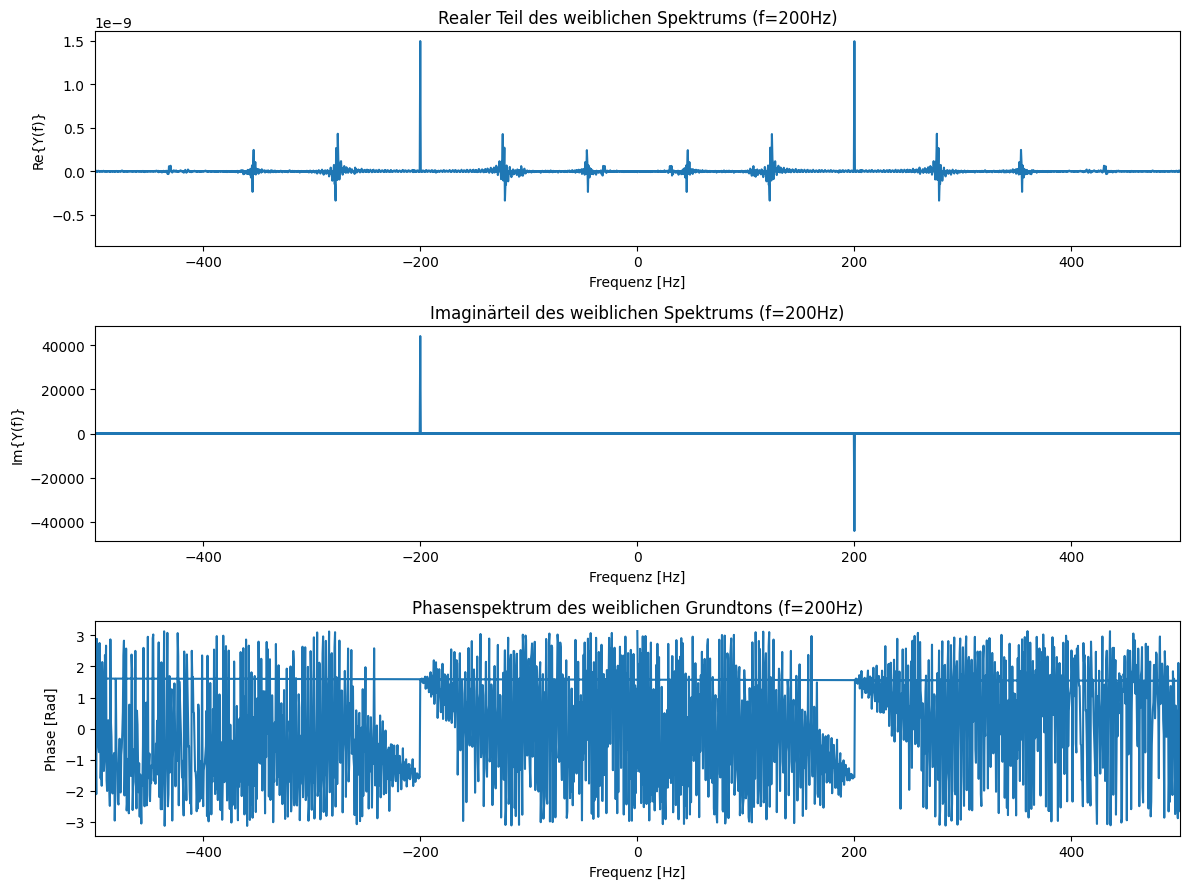

In [38]:

# Plotten des Real- und Imagin√§rteils sowie des Phasenspektrums f√ºr m√§nnliche Stimme
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(freq_male, spectrum_male.real)
plt.xlim(-500, 500)
plt.title('Realer Teil des m√§nnlichen Spektrums (f=130Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Re{Y(f)}')

plt.subplot(3, 1, 2)
plt.plot(freq_male, spectrum_male.imag)
plt.xlim(-500, 500)
plt.title('Imagin√§rteil des m√§nnlichen Spektrums (f=130Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Im{Y(f)}')

plt.subplot(3, 1, 3)
plt.plot(freq_male, np.angle(spectrum_male))
plt.xlim(-500, 500)
plt.title('Phasenspektrum des m√§nnlichen Grundtons (f=130Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Phase [Rad]')

plt.tight_layout()
plt.show()

# Plotten des Real- und Imagin√§rteils sowie des Phasenspektrums f√ºr weibliche Stimme
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(freq_female, spectrum_female.real)
plt.xlim(-500, 500)
plt.title('Realer Teil des weiblichen Spektrums (f=200Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Re{Y(f)}')

plt.subplot(3, 1, 2)
plt.plot(freq_female, spectrum_female.imag)
plt.xlim(-500, 500)
plt.title('Imagin√§rteil des weiblichen Spektrums (f=200Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Im{Y(f)}')

plt.subplot(3, 1, 3)
plt.plot(freq_female, np.angle(spectrum_female))
plt.xlim(-500, 500)
plt.title('Phasenspektrum des weiblichen Grundtons (f=200Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Phase [Rad]')

plt.tight_layout()
plt.show()


#### b. Verk√ºrzen Sie nun die L√§nge des Signals (1 Periode, ¬Ω Periode, ¬º Periode, ‚Ä¶) und beobachten und erkl√§ren Sie das Verhalten des Spektrums.

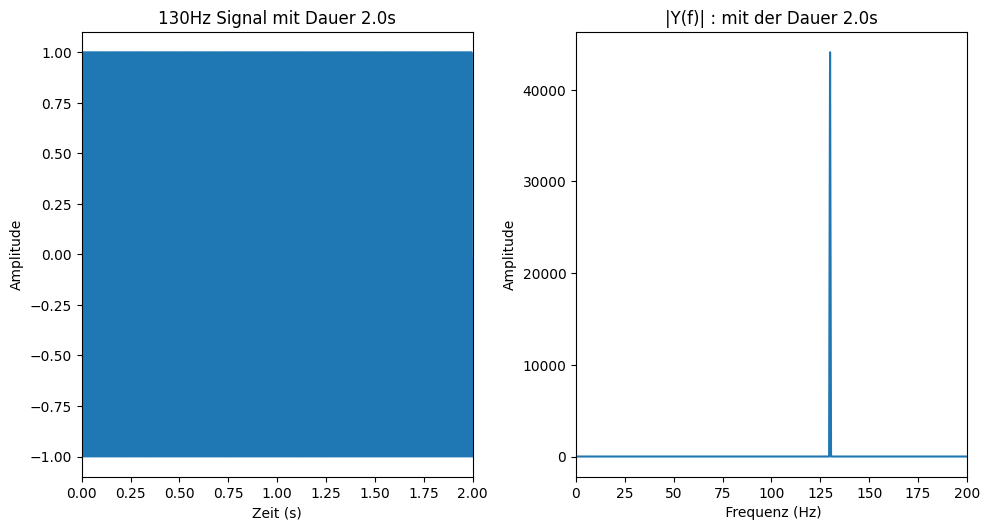

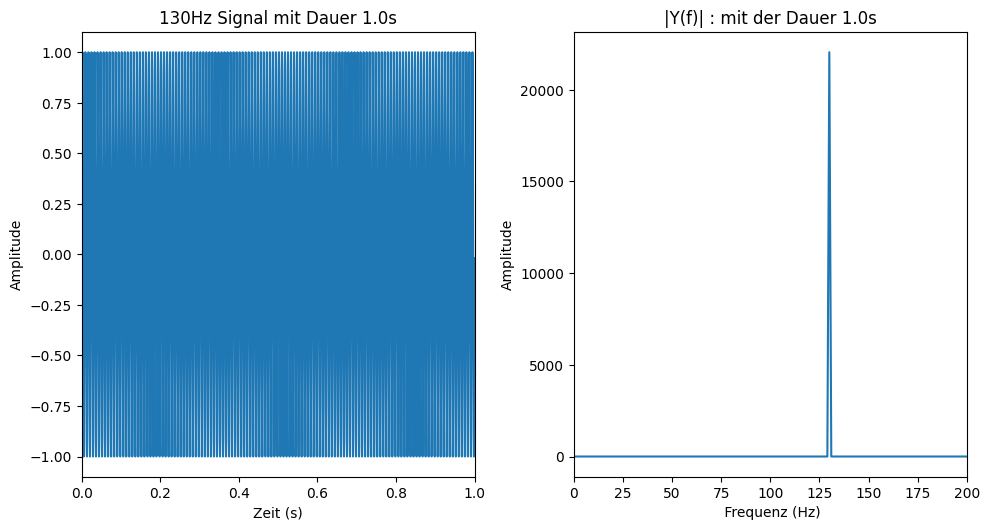

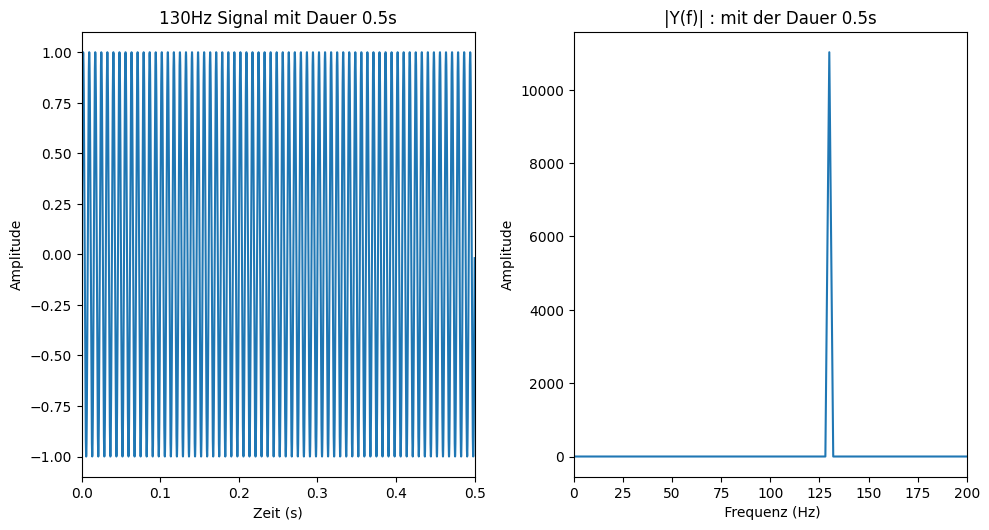

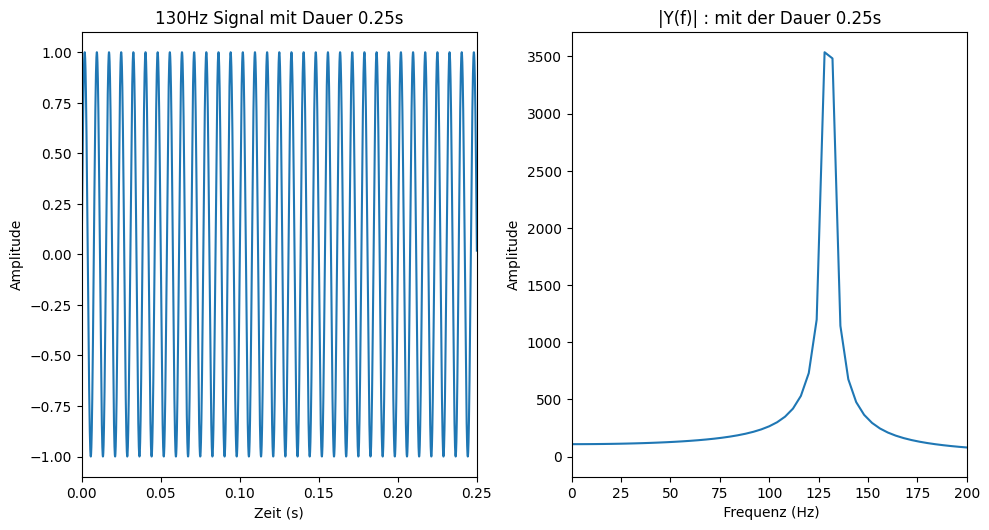

In [39]:
td = 2.0 # Zeitdauer 
f0 = 130 # Frequenz in Hz 
sampling_rate = 44100 #Abtastrate 

while td >= 0.25:
    anzahl_samples = int(sampling_rate * td)
    t = np.linspace(0, td, anzahl_samples, endpoint=False)
    shortened_signal = np.sin(2 * np.pi * f0 * t)
    
    # Fourder-Transformation und Frequenzen berechnen
    spectrum_shortened_signal = np.abs(np.fft.fft(shortened_signal))
    frequenzen = np.fft.fftfreq(len(shortened_signal), 1.0/sampling_rate)
    
    # Plotten des Signals und des Spektrums
    plt. figure(figsize=(10, 10))
    plt. subplot(2, 2, 1)
    plt. plot(t, shortened_signal) 
    plt. xlim(0, td) 
    plt.xlabel('Zeit (s)') 
    plt. ylabel('Amplitude') 
    plt. title(f'130Hz Signal mit Dauer {td}s')

    # Frequenzbereich
    plt. subplot(2, 2, 2)
    plt. plot(frequenzen[: len(frequenzen)//2], spectrum_shortened_signal[: len(spectrum_shortened_signal)//2]) 
    plt. title(f'|Y(f)| : mit der Dauer {td}s') 
    plt. xlabel(' Frequenz (Hz)') 
    plt. ylabel( 'Amplitude') 
    plt. xlim(0, 200) 
    plt.tight_layout() 
    plt. show()
    
    td /= 2 

#### c. Analysieren Sie die von Ihnen in Labor 1 erstellte Sprachbotschaft "Dies ist eine Suchmaschine". Laden Sie das Signal und plotten Sie den Signalverlauf, das zugeh√∂rige Leistungsspektrum in [db] und die Phase. Interpretieren Sie die Diagramme.

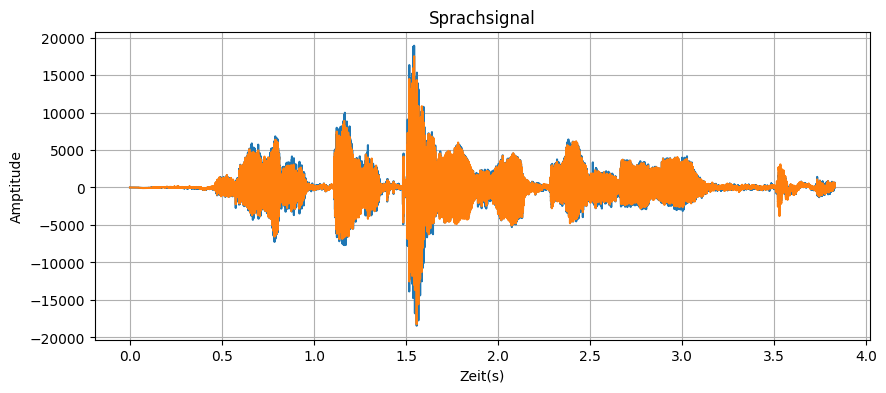

In [40]:
# Pfad zur vorhandenen Audiodatei
audio_path = 'Aufzeichnung.wav'

rate, signal = wav.read(audio_path)
time = np.arange(0, len(signal)) / rate 

plt.figure(figsize=(10,4))
plt.plot(time,signal)
plt.xlabel("Zeit(s)")
plt.ylabel("Amptitude")
plt.title("Sprachsignal")
plt.grid(True)
plt.show()


C:\Users\sinac\AppData\Local\Temp\ipykernel_27960\2894976510.py:8: RuntimeWarning: divide by zero encountered in log10
  leistungsspektrumDB = 10 * np.log10(np.abs(spectrum_signal)**2)


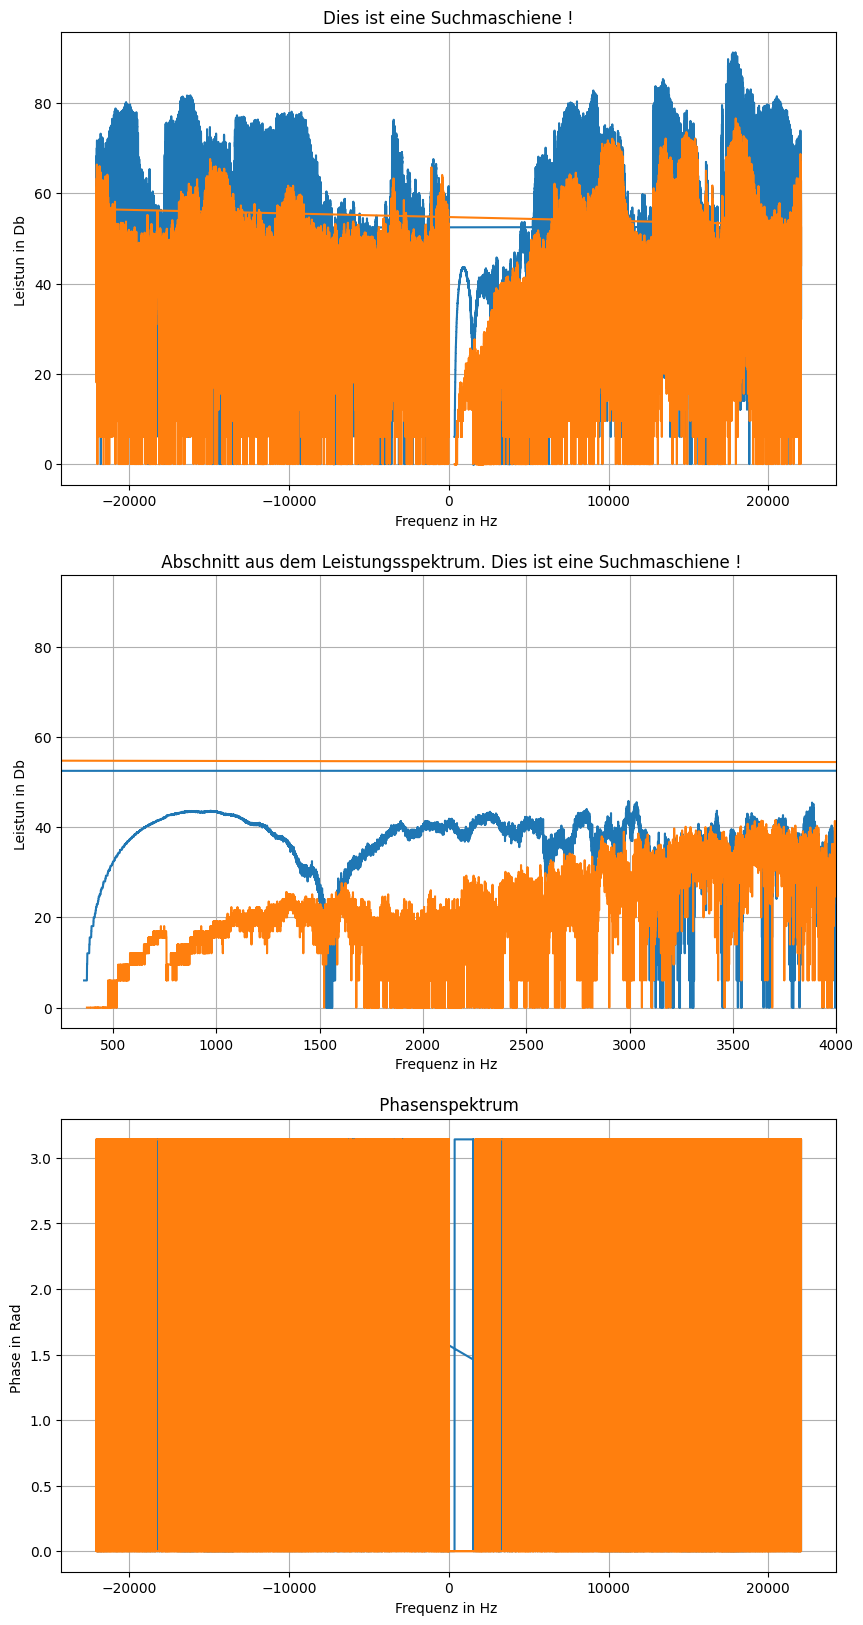

In [49]:
from scipy.io import wavfile

sempling_rate , signal = wavfile.read(audio_path)

spectrum_signal = np.fft.fft(signal)
frequenz = np.fft.fftfreq(len(signal), 1/ sampling_rate)

leistungsspektrumDB = 10 * np.log10(np.abs(spectrum_signal)**2) 
phase_signal = np.angle(spectrum_signal) # Phase 

plt.figure(figsize=(10,20))
plt.subplot(3,1,1)
plt.plot (frequenz, leistungsspektrumDB)
plt.grid(True)
plt.xlabel("Frequenz in Hz ")
plt.ylabel("Leistun in Db ")
plt.title("Dies ist eine Suchmaschiene !")

plt.subplot(3,1,2)
plt.plot (frequenz, leistungsspektrumDB)
plt.xlim(250,4000)
plt.grid(True)
plt.xlabel("Frequenz in Hz ")
plt.ylabel("Leistun in Db ")
plt.title(" Abschnitt aus dem Leistungsspektrum. Dies ist eine Suchmaschiene !")

plt.subplot(3,1,3)
plt.plot (frequenz, phase_signal)
plt.grid(True)
plt.xlabel("Frequenz in Hz ")
plt.ylabel("Phase in Rad ")
plt.title(" Phasenspektrum ")

plt.show()

#### d. Schneiden Sie anschlie√üend mittels eines Audioprogrammes die beiden W√∂rter "Dies ist" und das Wort "Dies" aus ihrem Sprachsignal aus und speichern diese in einer separaten Audio-Datei. Suchen Sie sich in √∂ffentlich verf√ºgbaren Sprachkonserven Audiodateien f√ºr den Vokal "i" und den Konsonanten "s". Berechnen Sie anschlie√üend die zugeh√∂rigen Leistungsspektren und vergleichen Sie diese mit dem Leistungsspektrum der gesamten Sprachnachricht. Erkl√§ren Sie ihre Beobachtungen. Plotten Sie den jeweiligen Signalverlauf inklusive dem quadratischen Mittel (rms:root mean square) der Amplitude des Signals. Was beobachten Sie?

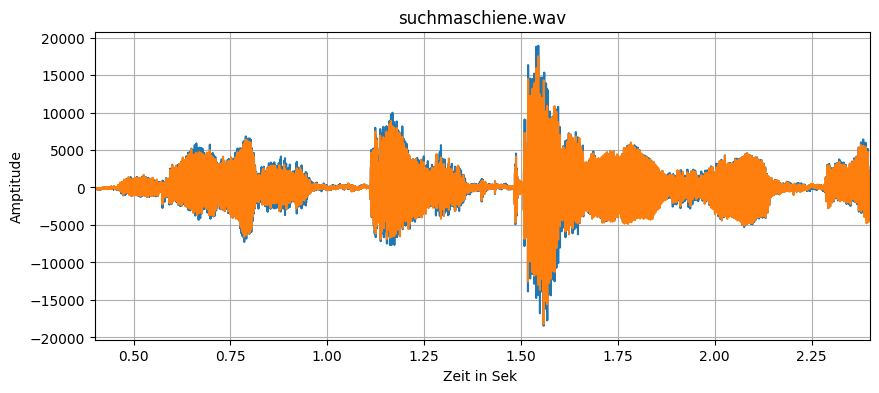

RMS: 42.72683596952772


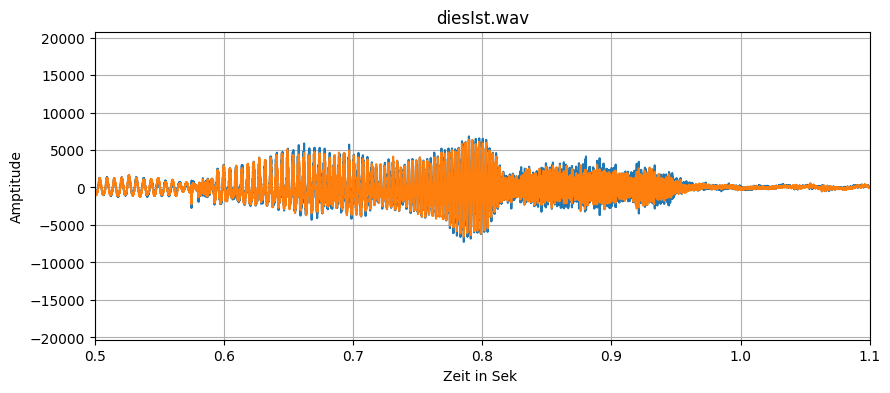

RMS: 42.72683596952772


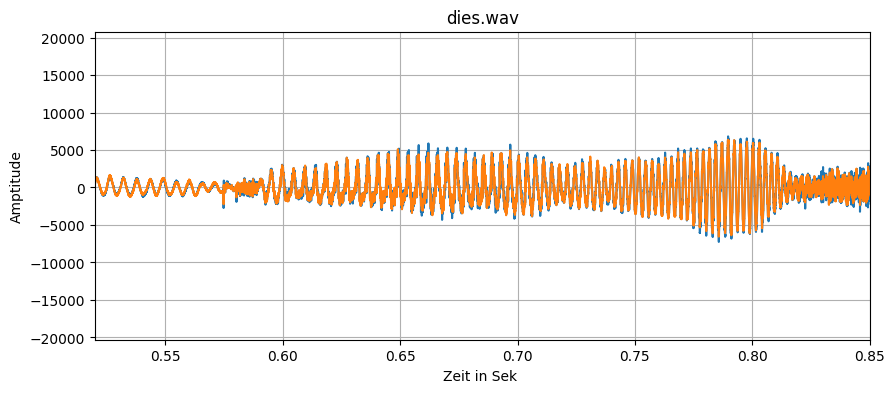

RMS: 42.72683596952772


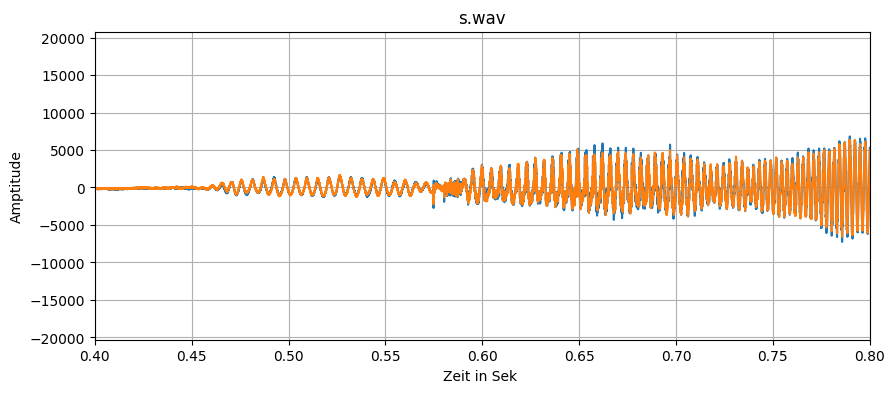

RMS: 42.72683596952772


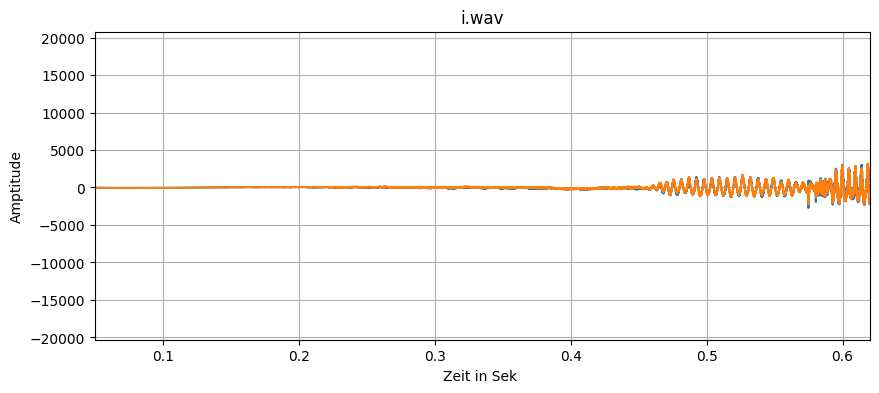

RMS: 42.72683596952772


In [51]:
audio_file = ["suchmaschiene.wav" , "diesIst.wav" , "dies.wav" , "s.wav", "i.wav" ]
audio_time = [0.4, 2.4, 0.5, 1.1, 0.52, 0.85, 0.4, 0.8, 0.05, 0.62]

i = 0 
k = 1

for audio in audio_file : 
    rate , signal = wavfile.read(audio_path)
    time = np.arange(0,len(signal)) / rate 
    rms = np.sqrt(np.mean(np.square (signal)))
    
    plt.figure(figsize=(10,4))
    plt.plot ( time, signal) 
    plt.xlabel("Zeit in Sek ")
    plt.ylabel("Amptitude")
    plt.title(audio)
    plt.xlim(audio_time[i], audio_time[k])
    plt.grid(True)
    plt.show()
    i += 2 
    k += 2
    print (f"RMS: {rms}") 

#### e. Berechnen Sie die Faltung zwischen einer Sinusfunktion (ùëì= 1ùêªùëß,ùë• = 1) und der Impulsantwort e / im Bereich t ‚àà [0,4œÄ]. Interpretieren Sie das Ergebnis.

In [79]:

# Parameter
f0 = 1 
tMax = 4 * 3.14159
dt = 0.01 

# Zeitvektor
t = np.arange(0, tMax, dt)

# Signal x(t)
x = np.sin(2 * 3 * f0 * t)

# Impulsantwort h(t)
h = np.exp(-t / 2)

# Faltung y(t) = x(t) * h(t)
y = np.convolve(x, h, mode='full') * dt

# Zeitvektor f√ºr gefaltetes Signal
tConv = np.arange(0, tMax + tMax, dt)

plt.figure(figsize=(10,6))

plt.subplot(3,1,1)
plt.plot(t,x, lable='x(t) = sin(2PIt)')
plt.title('sinusfunktion')
plt.xlabel('Zeit in sek ')
plt.ylabel('Amptitude')
plt.grid(True)

plt.subplot(3,1,2)
plt.plot( t,h, lable='h(t) = e^(-t/2)', color= 'orange')
plt.title('Impulsantwort')
plt.xlabel('Zeit in sek ')
plt.ylabel('Amptitude')
plt.grid(True)

plt.subplot(3,1,3)
plt.plot( tConv ,y , lable='y(t) = x(t)* h(t)', color= 'green')
plt.title('Faltung')
plt.xlabel('Zeit in sek ')
plt.ylabel('Amptitude')
plt.grid(True)

plt.tight_layout()
plt.show()

TypeError: 'tuple' object is not callable